In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [2]:
X_np = np.load("/Users/hyun/Desktop/softmax/data/X.npy")
y_np = np.load("/Users/hyun/Desktop/softmax/data/y.npy")

In [3]:
X_train = torch.tensor(X_np, dtype=torch.float32)
y_train = torch.tensor(y_np, dtype=torch.long)

In [4]:
X_train.shape

torch.Size([5000, 400])

In [5]:
y_train.shape

torch.Size([5000, 1])

In [6]:
y_train = y_train.view(-1)
y_train.shape

torch.Size([5000])

In [7]:
classes = torch.unique(y_train)
print(classes)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [8]:
NUM_SAMPLES = X_train.shape[0]
INPUT_DIM = X_train.shape[1]
NUM_CLASSES = len(classes)
LR = 0.001
EPOCHS = 40
BATCH_SIZE = 32

In [9]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In TensorFlow, it's possible to use a softmax activation in the output layer, but using logits is generally preferred for numerical stability and optimization. In PyTorch, however, since the loss function already includes softmax internally, applying softmax in the output layer should be avoided.

In [10]:
class PreferredModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 25),
            nn.ReLU(),
            nn.Linear(25, 15),
            nn.ReLU(),
            nn.Linear(15, 10)  # No softmax here — CrossEntropyLoss expects raw logits
        )

    def forward(self, x):
        return self.model(x)

In [11]:
model = PreferredModel(input_dim=INPUT_DIM)

In [12]:
layer1 = model.model[0]
layer2 = model.model[2]
layer3 = model.model[4]

W1, b1 = layer1.weight.data, layer1.bias.data
W2, b2 = layer2.weight.data, layer2.bias.data
W3, b3 = layer3.weight.data, layer3.bias.data

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")


W1 shape = torch.Size([25, 400]), b1 shape = torch.Size([25])
W2 shape = torch.Size([15, 25]), b2 shape = torch.Size([15])
W3 shape = torch.Size([10, 15]), b3 shape = torch.Size([10])


In [13]:
criterion = nn.CrossEntropyLoss()  # Applies softmax and log internally

In [14]:
optimizer = optim.Adam(model.parameters(), lr=LR)

In [15]:
train_losses = []

for epoch in range(EPOCHS):
    total_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)  # 기록
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {avg_loss:.4f}")


Epoch 1/40, Loss: 1.6925
Epoch 2/40, Loss: 0.6579
Epoch 3/40, Loss: 0.4410
Epoch 4/40, Loss: 0.3686
Epoch 5/40, Loss: 0.3250
Epoch 6/40, Loss: 0.2996
Epoch 7/40, Loss: 0.2819
Epoch 8/40, Loss: 0.2618
Epoch 9/40, Loss: 0.2433
Epoch 10/40, Loss: 0.2321
Epoch 11/40, Loss: 0.2203
Epoch 12/40, Loss: 0.2105
Epoch 13/40, Loss: 0.2015
Epoch 14/40, Loss: 0.1952
Epoch 15/40, Loss: 0.1913
Epoch 16/40, Loss: 0.1839
Epoch 17/40, Loss: 0.1727
Epoch 18/40, Loss: 0.1701
Epoch 19/40, Loss: 0.1609
Epoch 20/40, Loss: 0.1549
Epoch 21/40, Loss: 0.1507
Epoch 22/40, Loss: 0.1436
Epoch 23/40, Loss: 0.1375
Epoch 24/40, Loss: 0.1319
Epoch 25/40, Loss: 0.1292
Epoch 26/40, Loss: 0.1232
Epoch 27/40, Loss: 0.1193
Epoch 28/40, Loss: 0.1146
Epoch 29/40, Loss: 0.1116
Epoch 30/40, Loss: 0.1074
Epoch 31/40, Loss: 0.1059
Epoch 32/40, Loss: 0.0973
Epoch 33/40, Loss: 0.0942
Epoch 34/40, Loss: 0.0902
Epoch 35/40, Loss: 0.0879
Epoch 36/40, Loss: 0.0831
Epoch 37/40, Loss: 0.0807
Epoch 38/40, Loss: 0.0797
Epoch 39/40, Loss: 0.

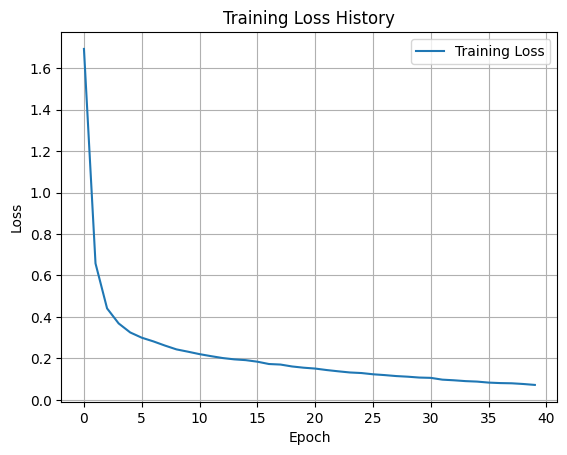

In [16]:
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.legend()
plt.grid(True)
plt.show()

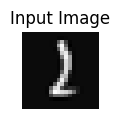

Predicting a Two: 
[[1.7885751e-06 2.0640866e-01 6.8112928e-01 1.3554792e-02 6.3491547e-07
  2.4793773e-05 2.7506463e-05 9.8704256e-02 7.7778343e-05 7.0538394e-05]]
Largest Prediction Index: 2


/var/folders/jb/yg6x_wxn2fb7rpvjf55n9b5c0000gn/T/ipykernel_53254/3762181009.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_input = torch.tensor(image_of_two.reshape(1, -1), dtype=torch.float32)


In [17]:
image_of_two = X_train[1015]

plt.figure(figsize=(1, 1))
plt.imshow(image_of_two.reshape(20, 20).T, cmap='gray')
plt.axis('off')
plt.title("Input Image")
plt.show()

model.eval()
x_input = torch.tensor(image_of_two.reshape(1, -1), dtype=torch.float32)

with torch.no_grad():
    logits = model(x_input)
    probs = torch.nn.functional.softmax(logits, dim=1)

print(f"Predicting a Two: \n{probs.numpy()}")
print(f"Largest Prediction Index: {torch.argmax(probs).item()}")

/var/folders/jb/yg6x_wxn2fb7rpvjf55n9b5c0000gn/T/ipykernel_53254/17958335.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_input = torch.tensor(X_train[random_index].reshape(1, -1), dtype=torch.float32)


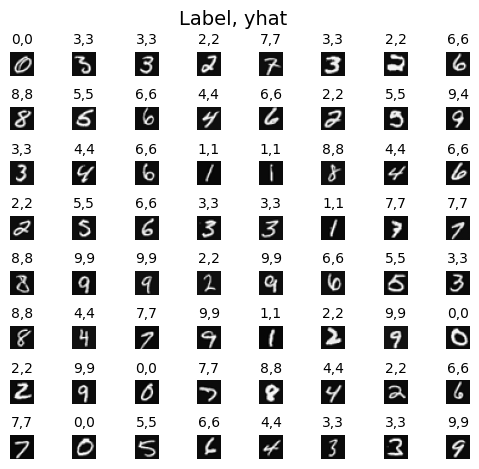

In [18]:
model.eval()
m = X_train.shape[0]

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    image = X_train[random_index].reshape((20, 20)).T
    ax.imshow(image, cmap='gray')

    x_input = torch.tensor(X_train[random_index].reshape(1, -1), dtype=torch.float32)

    with torch.no_grad():
        logits = model(x_input)
        probs = torch.nn.functional.softmax(logits, dim=1)
        yhat = torch.argmax(probs, dim=1).item()

    y_true = y_train[random_index] if y_train.ndim == 1 else y_train[random_index][0]

    ax.set_title(f"{y_true},{yhat}", fontsize=10)
    ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize=14)
plt.show()